### 一、数据校验
#### 1.一致性校验
1.时间校验
- 时间范围不一致
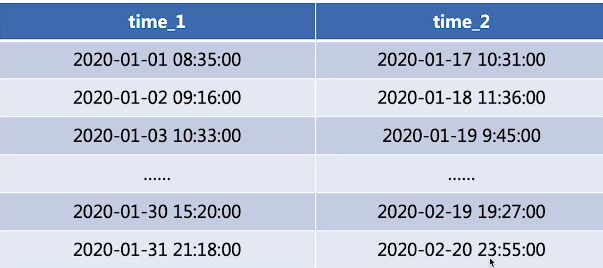
- 时间粒度不一致
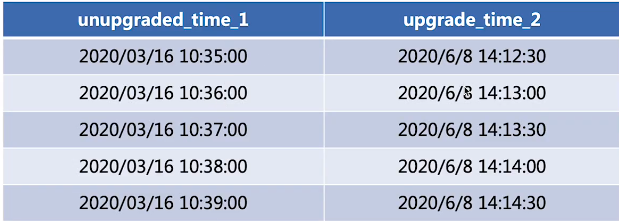
- 时间格式不一致
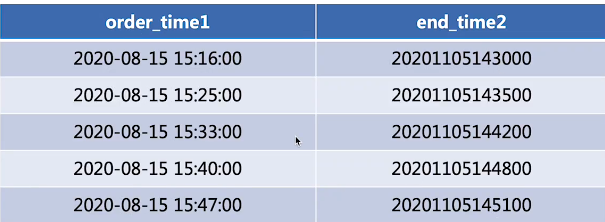
- 时区不一致
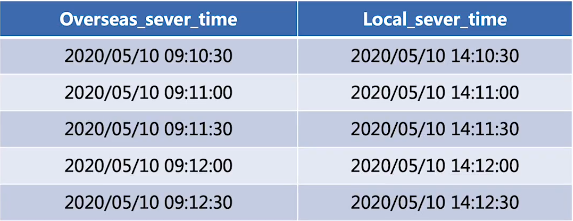

2.字段信息校验
- 同名异议
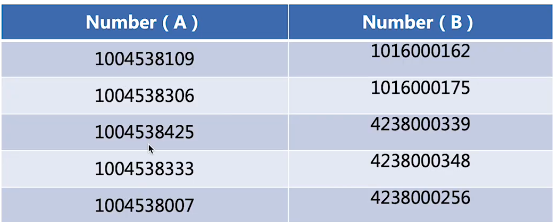
- 同名同义
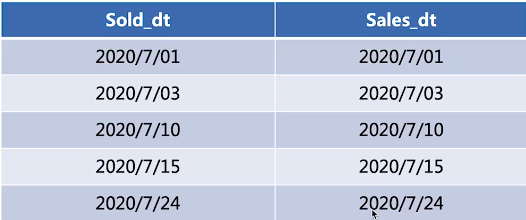
- 单位不统一
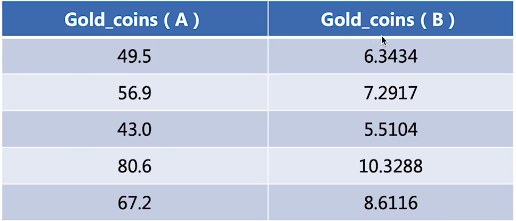

#### 2.缺失值校验
##### 1.缺失值产生的原因
- 信息遗漏
- 属性值不存在
- 信息暂时无法或获取信息的代价太大    

##### 2.缺失值产生的影响
- 丢失大量有用信息
- 不确定性更加显著，模型中蕴含的规律更难把握
- 使建模过程中陷入混乱，导致不可靠的输出    

##### 3.缺失值的校验
函数或方法名|函数或方法功能|使用格式
--:|--|:--
isnull|用于判断是否为空值|pandas.DataFrame.isnill()或pandas.isnull(obj)
notnull|用于判断是否为非空值|pandas.DataFrame.notnill()或pandas.notnull(obj)
count|用于计算非元素|pandas.DataFrame.count(axis=0,level=None,numeric_only=False)

In [33]:
import pandas as pd
import numpy as np

# 创建数据
data = {
    '编号': [0, 1, 2, 3, 4, 5],
    'x1': [200691.0, 201586.0, 205473.0, 205473.0, np.nan, 201948.0],
    'x2': [46.0, 39.0, np.nan, 23.0, 15.0, np.nan],
    'x3': [15.3, np.nan, 56.7, np.nan, 46.1, 33.8],
    'x4': [1766.0, 3582.0, 4861.0, 2589.0, 3671.0, 1975.0]
}

# 创建DataFrame
data = pd.DataFrame(data)
data

,编号,x1,x2,x3,x4
0,0,200691.0,46.0,15.3,1766.0
1,1,201586.0,39.0,NaN,3582.0
2,2,205473.0,NaN,56.7,4861.0
3,3,205473.0,23.0,NaN,2589.0
4,4,NaN,15.0,46.1,3671.0
5,5,201948.0,NaN,33.8,1975.0


In [34]:
# 查看是否为空值
data.isnull()

,编号,x1,x2,x3,x4
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,False,True,False
4,False,True,False,False,False
5,False,False,True,False,False


In [35]:
# 查看是否为非空值
data.notnull()

,编号,x1,x2,x3,x4
0,True,True,True,True,True
1,True,True,True,False,True
2,True,True,False,True,True
3,True,True,True,False,True
4,True,False,True,True,True
5,True,True,False,True,True


In [37]:
# 统计非空的个数
data.count()

编号    6
x1    5
x2    4
x3    4
x4    6
dtype: int64

In [38]:
# 非空的比率
data.count()/len(data)

编号    1.000000
x1    0.833333
x2    0.666667
x3    0.666667
x4    1.000000
dtype: float64

#### 3.异常值校验
##### 1.简单统计量分析    
可以先对变量做一个描述性统计分析，进而查看哪些数据使不合理的。Python异常值检测函数方法：
函数或方法名|函数或方法功能|使用个数
--:|--:|-- 
percentile|用于计算百分位数|numpy.percentitle(a,q,axis=None,out=None,overwrite_input=False,interpolation='linear',keepdims=False)
mean|用于计算平均值|pandas.DataFrame.mean(axis=None,skipna=None,level=None,numeric_only=None,**kwargs)
std|用于计算标准差|pandas.DataFrame.std(axis=None,skipna=None,level=None,ddof=1,numeric_only=None,**kwargs)

Python异常值检测函数或方法的常用参数及其说明：
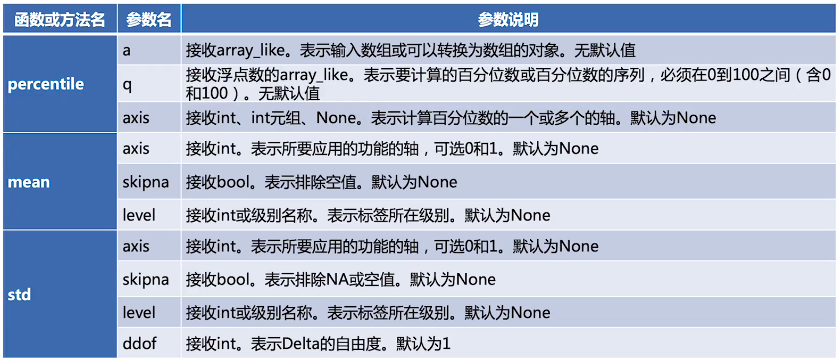




##### 2. 3sigma原则与IQR准则
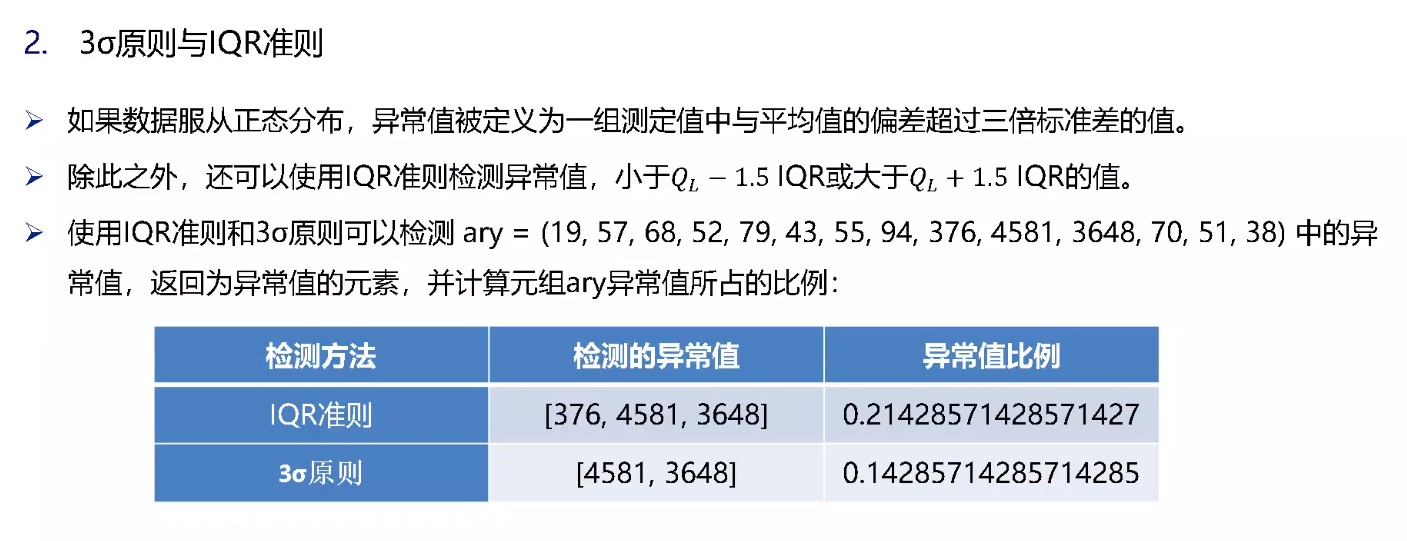

In [40]:
import numpy as np
arg=(19,57,68,52,79,43,55,94,376,4581,3648,70,51,38)
print(arg)

(19, 57, 68, 52, 79, 43, 55, 94, 376, 4581, 3648, 70, 51, 38)


In [41]:
# IQR准则
Percentile=np.percentile(arg,[0,25,50,75,100])
Percentile

array([  19.  ,   51.25,   62.5 ,   90.25, 4581.  ])

In [44]:
IQR=Percentile[3]-Percentile[1]
uplimit=Percentile[3]+IQR*1.5#计算临界值上界
arrayownlimit=Percentile[1]-IQR*1.5#计算临界值下界
# 判断异常值，大于上界或小于下界
abnormal=[i for i in arg if i>uplimit or i<arrayownlimit]
print(f'IQR准则检测出的异常值：',abnormal)
print(f'异常值比例：{len(abnormal)/len(arg)}')

IQR准则检测出的异常值： [376, 4581, 3648]
异常值比例：0.21428571428571427


In [54]:
# 3sigma原则
arg=(999999999,57,68,52,79,43,55,94,376,4581,3648,70,51,38)
print(arg)

array_mean=np.array(arg).mean()#平均值
array_aarray=np.array(arg).std()#计算标准差
array_cha=arg-array_mean#计算每个元素与平均值的偏差
array_cha

(999999999, 57, 68, 52, 79, 43, 55, 94, 376, 4581, 3648, 70, 51, 38)


array([ 9.28570770e+08, -7.14291724e+07, -7.14291614e+07, -7.14291774e+07,
       -7.14291504e+07, -7.14291864e+07, -7.14291744e+07, -7.14291354e+07,
       -7.14288534e+07, -7.14246484e+07, -7.14255814e+07, -7.14291594e+07,
       -7.14291784e+07, -7.14291914e+07])

In [59]:
# 返回异常值所在位置
ind=[i for i in range(len(array_cha)) if np.abs(array_cha[i])>array_aarray*3]
print(f'异常值所在的位置{ind}')
abnormal=[arg[i] for i in ind]
print('3sigma检测出的异常值：',abnormal)
print('异常值比例：',len(abnormal)/len(arg))

异常值所在的位置[0]
3sigma检测出的异常值： [999999999]
异常值比例： 0.07142857142857142


##### 3.箱型图分析
- 箱型图提供了识别异常值的直观方法
- 绘制箱型图检测便利店销售额数据中的异常值
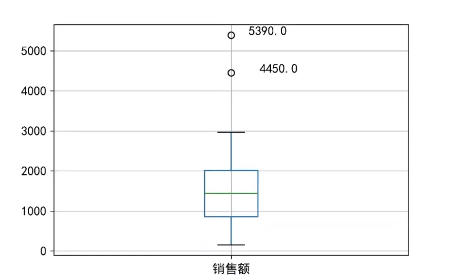

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

# 随机生成销售额数据
np.random.seed(42)
sales = np.random.normal(loc=5000, scale=2000, size=100)

# 添加一些异常值
sales[10] = 20000  # 添加一个较大的异常值
sales[25] = 1000   # 添加一个较小的异常值

# 创建DataFrame
data = {'销售额': sales}
df = pd.DataFrame(data)
df

,销售额
0,5993.428306
1,4723.471398
2,6295.377076
3,8046.059713
4,4531.693251
...,...
95,2072.970104
96,5592.240554
97,5522.110544
98,5010.226913


In [66]:
# 描述统计
df.describe()

,销售额
count,100.000000
mean,4909.356867
std,2399.900378
min,-239.490208
25%,3774.880204
50%,4746.087416
75%,6001.704946
max,20000.000000


[-239.49020817948895 20000.0]


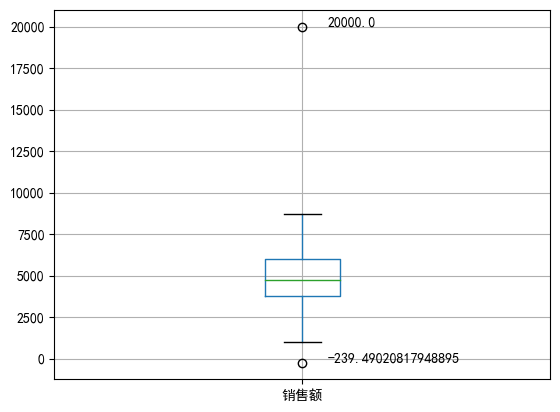

In [76]:
p=df.boxplot(return_type='dict')
x=p['fliers'][0].get_xdata()#获取异常值标签
y=p['fliers'][0].get_ydata()
y.sort()
print(y)
for i in range(len(x)):
    if i>0:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.05,y[i]))
    else:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.05,y[i]))
plt.rc('font',size=10)
plt.show()

### 二、数据特征分析

#### 1.描述性统计分析
##### 1.集中趋势度量
集中趋势使指总体中各单位的次数分布从两边向中间集中的趋势，用于对比同类现象在不同的时间、地点和条件下的一般水平，反映同一总体某类现象在不同时间上变化的规律性、分析现象之间的依存关系。
- 均值：指在一组数据中所有数据之和再除以这组数据的个数
- 中位数：指将一组观察值从小到大进行排列，位于中间的数据
- 众数：指数据集中出现最频繁的值

##### 2.离中趋势度量
离中趋势度量是指总体中各单位标志值离分布中心的规模或程度，用于衡量和比较平均数代表性的大小、反映社会经济活动过程中的均衡性和节奏性、衡量风险程度。
- 极差：数据的离散程度
- 标准差：数据偏离均值的程度
- 变异系数：标准差相对于均值的离中趋势
- 四分位数间距：上四分位数与下四分位数之差    

pandas库的describe()方法可以给出一些基本的统计量，包括均值、标准差、最大值、最小值、分位数等。describe()方法的基本使用格式及参数说明如下：
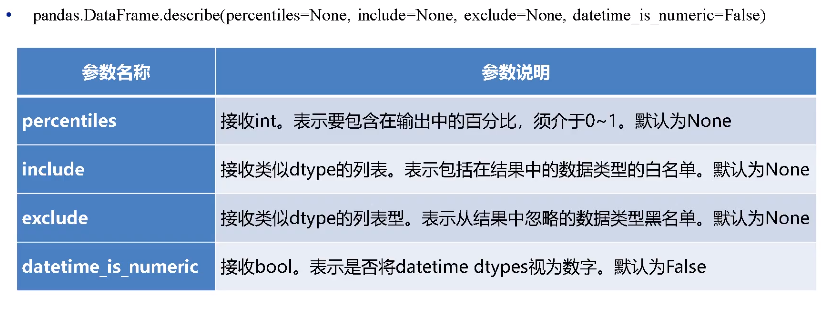

In [77]:
import pandas as pd

In [83]:
data=pd.read_csv('./data/movie.csv')[['num_critic_for_reviews']]
data.describe()

,num_critic_for_reviews
count,4867.000000
mean,137.988905
std,120.239379
min,1.000000
25%,49.000000
50%,108.000000
75%,191.000000
max,813.000000


In [85]:
statistics=data.describe()
# 计算其他统计量
statistics.loc['range']=statistics.loc['max']-statistics.loc['min']#极差
statistics.loc['var']=statistics.loc['std']-statistics.loc['mean']#变异系数
statistics.loc['dis']=statistics.loc['75%']-statistics.loc['25%']#四分位数间距
statistics


,num_critic_for_reviews
count,4867.000000
mean,137.988905
std,120.239379
min,1.000000
25%,49.000000
50%,108.000000
75%,191.000000
max,813.000000
range,812.000000
var,-17.749526


#### 2.分布分析
##### 1.定量数据的分布分析
- 对于定量数据而言，选择“组数”和“组宽”是做频率分布分析时最主要的问题，一般按照以下步骤进行：    
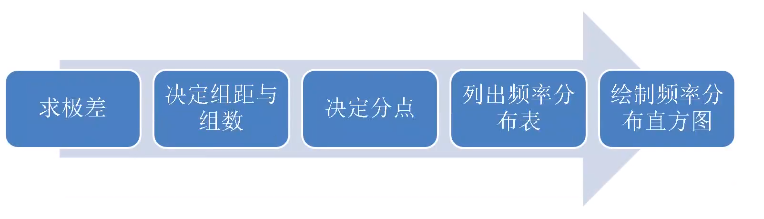
- 定量数据分组遵循的主要原则如下：
    - 各组之间必须时相互排斥的。
    - 各组必须将所有的数据包含在内。
    - 各组的组宽最好相等。

In [90]:
import pandas as pd
import numpy as np

# 设置随机种子，以便结果可复现
np.random.seed(0)

# 生成时间范围，例如一年的销售数据
start_date = "2023-01-01"
end_date = "2023-12-31"
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# 随机生成销售额数据，模拟销售情况
sales_data = np.random.randint(100, 1000, size=len(date_range))

# 创建包含时间和销售额的DataFrame
data = {
    '日期': date_range,
    '销售量': sales_data
}

data = pd.DataFrame(data)
data


,日期,销售量
0,2023-01-01,784
1,2023-01-02,659
2,2023-01-03,729
3,2023-01-04,292
4,2023-01-05,935
...,...,...
360,2023-12-27,193
361,2023-12-28,274
362,2023-12-29,505
363,2023-12-30,301


In [91]:
bins=[0,170,340,510,680,850,1020,1190,1360]
labels=['[0,170)','[170,340)','[340,510)','[510,680)','[680,850)','[850b,1020)','[1020,1190)','[1190,1360)']

In [95]:
import numpy as np
data['销售量分层']=pd.cut(data['销售量'],bins,labels=labels)
aggresult=data.groupby('销售量分层').agg({'销售量':np.size})
paggresult=round(aggresult/aggresult.sum(),2)*100
paggresult

C:\Users\ningmeng\AppData\Local\Temp\ipykernel_16340\132843887.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggresult=data.groupby('销售量分层').agg({'销售量':np.size})


,销售量
销售量分层,
"[0,170)",8.0
"[170,340)",21.0
"[340,510)",17.0
"[510,680)",17.0
"[680,850)",16.0
"[850b,1020)",21.0
"[1020,1190)",0.0
"[1190,1360)",0.0


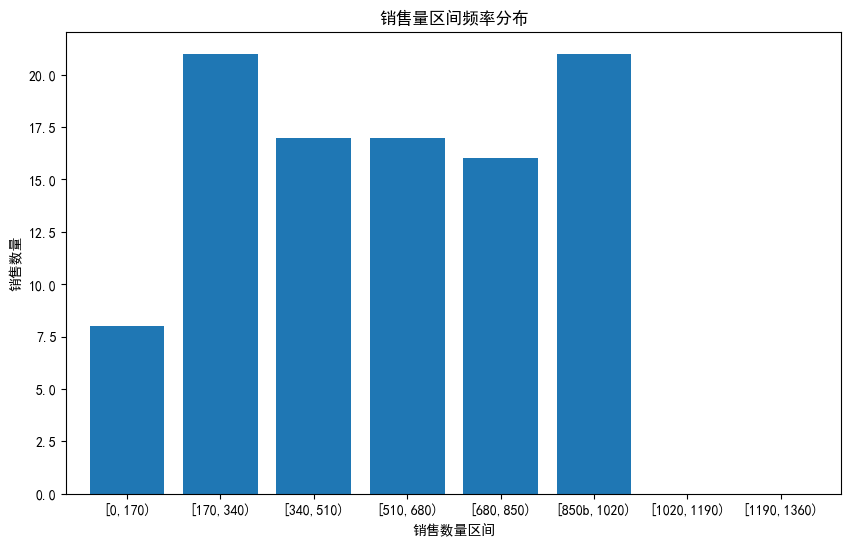

In [96]:
# 绘制频率分布直方图
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
paggresult['销售量'].plot(kind='bar',width=0.8,fontsize=10)#绘制频率直方图
plt.rcParams['font.sans-serif']='SimHei'
plt.title('销售量区间频率分布')
plt.xlabel('销售数量区间')
plt.ylabel('销售数量')
plt.xticks(rotation=0)
plt.show()

##### 2.定性数据的分布分析
- 对于定性数据，常根据数据的分类类型进行分组，可以采用饼图和柱形图对定性变量进行分布分析。
- 以某餐馆的各菜系在某时间内的销售额为例，采用定性数据的分布分析方法进行分析：
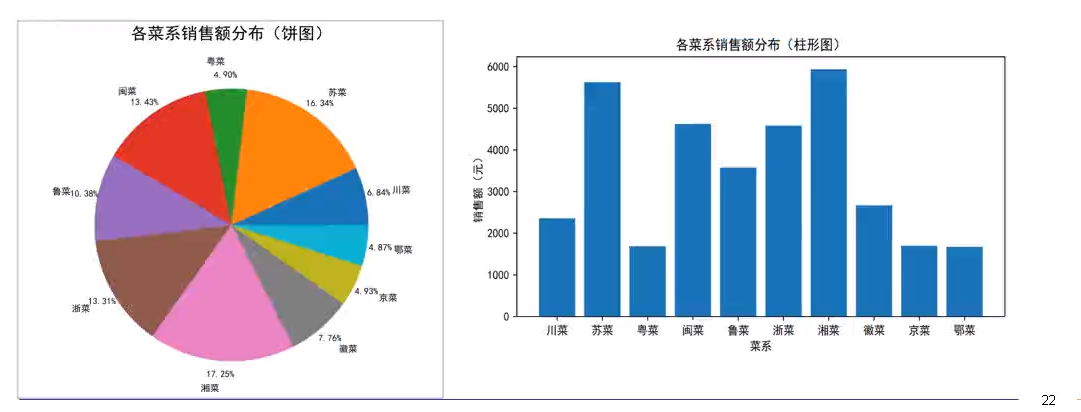

##### 3.对比分析
- 对比分析是指将两个相互联系的指标进行比较，从数量上展示和说明研究对象规模的大小、水平的高低、速度的快慢，以及各种关系是否协调，适用于指标间的横纵向比较、时间序列的比较分析。
- 对比分析主要有以下两种形式：
    - 绝对数比较：绝对数比较是利用绝对数进行对比，从而寻找差异的一种方法
    - 相对数比较：用于反映客观现象之间数量联系程度的综合指标
- 由于研究目的和对比基础不同，相对数可以分为以下几种：
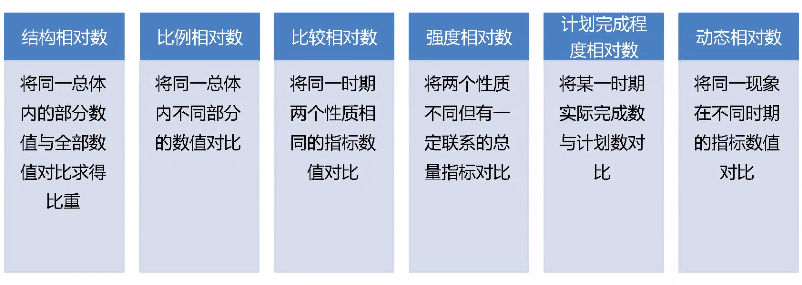

##### 4.周期分析
- 周期性分析是探索某个变量是否随着时间变化而呈现某种周期变化趋势
- 以某景区2019年3月份人流量为例子，根据人流量数据，制时序图，并分析景区人流量的变化趋势：
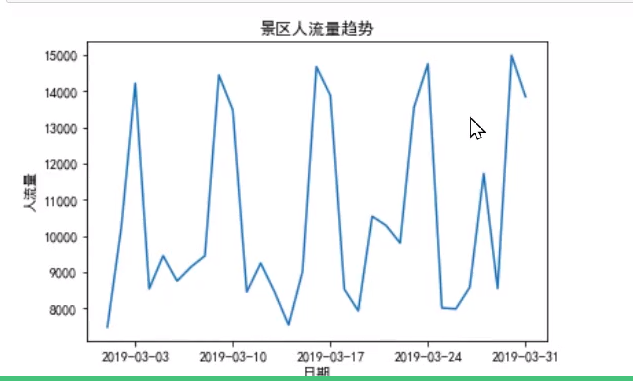

##### 5.贡献度分析
- 贡献度分析又称帕累托分析，贡献度分析的原理是帕累托法则，又称20/80定律。
- 以服装企业为例，根据企业对应得秋装盈利数据，绘制服装盈利帕累托图：
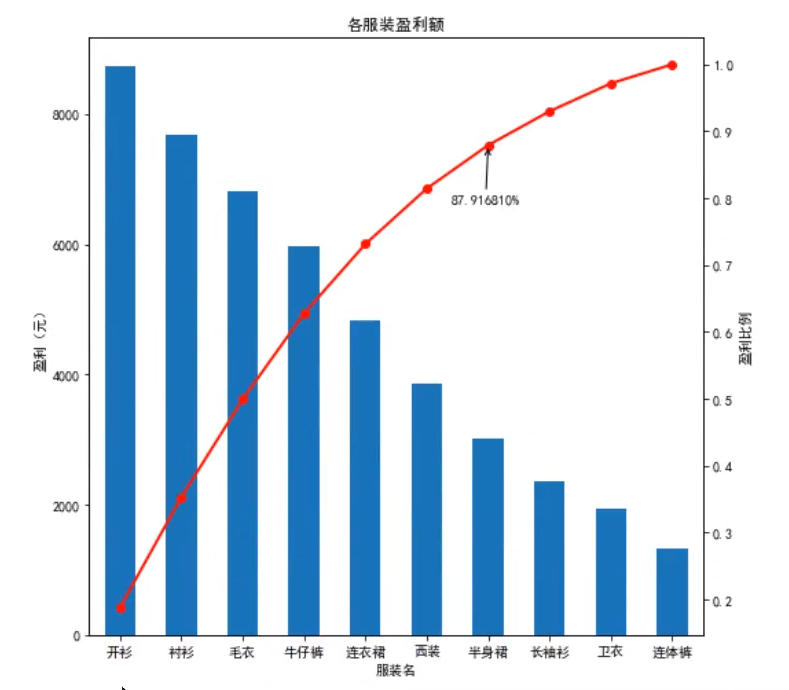

##### 6.相关性分析
1.直接绘制散点图    
    判断两个变量是否具有线性相关关系得最直观得方法是直接绘制散点图。
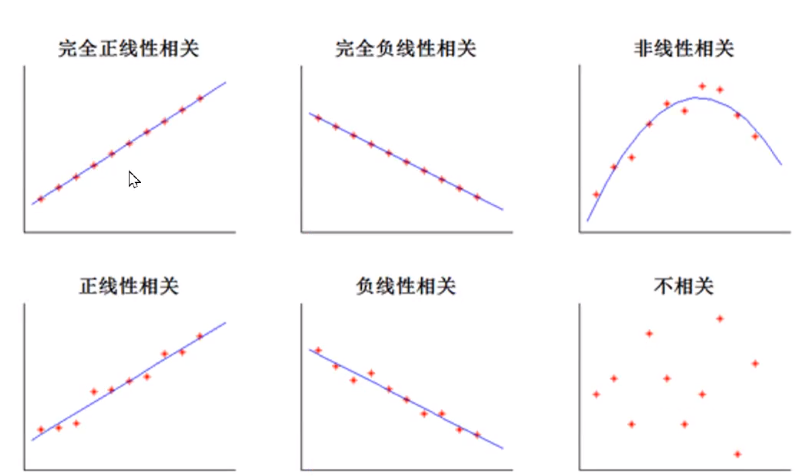

2.绘制散点图矩阵
    利用散点图矩阵同时绘制各变量间得散点图，从而快速发现多个变量间得主要相关性。
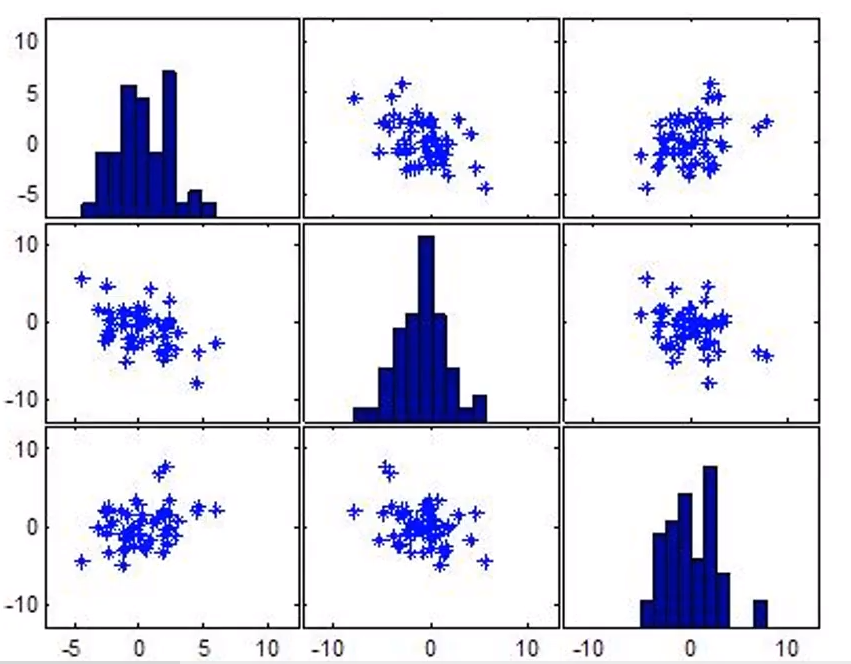

3.计算相关系数
    为了更加准确地描述变量之间得线性相关程度，可以通过计算相关系数来进行相关分享你。
- Pearson相关系数
    - Pearson相关系数一般可用于分析两个连续性变量之间得关系，其计算公式为：
    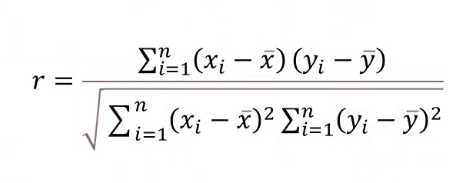
    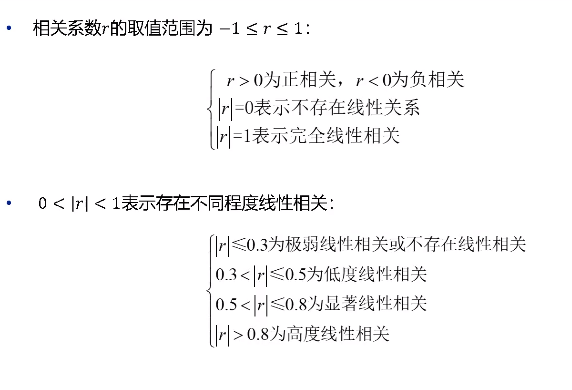
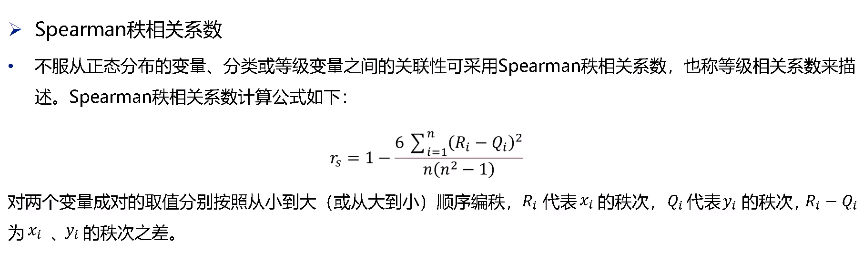
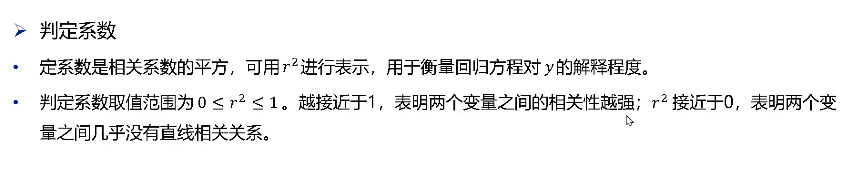
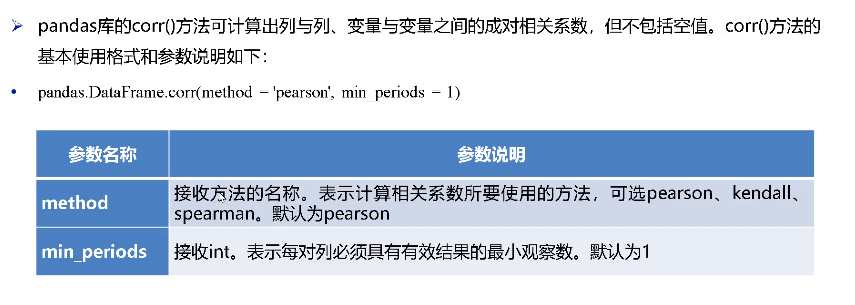